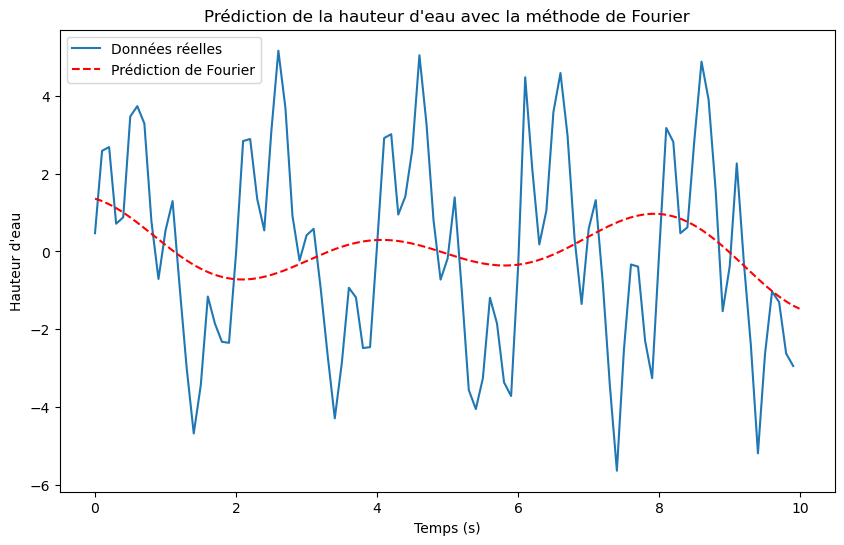

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Générer des données de hauteur d'eau fictives pour l'exemple
temps = np.arange(0, 10, 0.1)  # Temps de 0 à 10 secondes avec un pas de 0.1 seconde
hauteur_eau = 3 * np.sin(2 * np.pi * 0.5 * temps) + 2 * np.sin(2 * np.pi * 2 * temps) + 0.5 * np.random.normal(size=len(temps))

# Fonction de modèle avec une somme de cosinus
def modele_fourier(t, Z, *parametres):
    resultat = Z
    for i in range(0, len(parametres), 3):
        Ac = parametres[i]
        Wc = parametres[i + 1]
        Lc = parametres[i + 2]
        resultat += Ac * np.cos(Wc * t - Lc)
    return resultat

# Estimation des paramètres du modèle à partir des données
parametres_initiaux = [0] + [1, 1, 0] * 2  # Z, Ac1, Wc1, Lc1, Ac2, Wc2, Lc2, ...
parametres_optimaux, _ = curve_fit(modele_fourier, temps, hauteur_eau, p0=parametres_initiaux)

# Générer des points temporels pour la prédiction
temps_prediction = np.arange(0, 10, 0.01)

# Faire la prédiction
hauteur_eau_predite = modele_fourier(temps_prediction, *parametres_optimaux)

# Afficher les résultats
plt.figure(figsize=(10, 6))
plt.plot(temps, hauteur_eau, label='Données réelles')
plt.plot(temps_prediction, hauteur_eau_predite, label='Prédiction de Fourier', linestyle='--', color='red')
plt.title('Prédiction de la hauteur d\'eau avec la méthode de Fourier')
plt.xlabel('Temps (s)')
plt.ylabel('Hauteur d\'eau')
plt.legend()
plt.show()


In [26]:
print("Z = ",parametres_optimaux[0])
print("Ac = ", parametres_optimaux[1])
print("Wc = ", parametres_optimaux[2])
print("Lc = ", parametres_optimaux[3])

Z =  -0.09550132498700409
Ac =  42.08363760043166
Wc =  1.2498146528247078
Lc =  -1.4843789028881356


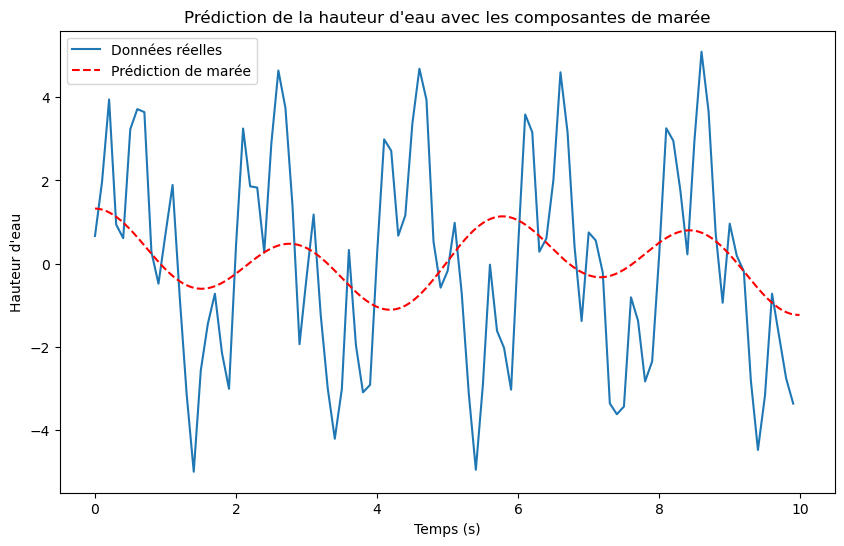

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Fonction de modèle avec une somme de cosinus basée sur les composantes de marée
def modele_marée(t, Z, *parametres):
    resultat = Z
    for i in range(0, len(parametres), 3):
        Ac = parametres[i]
        Wc = parametres[i + 1]
        Lc = parametres[i + 2]
        resultat += Ac * np.cos(Wc * t - Lc)
    return resultat

# Supposons que vous ayez les composantes de marée du site NOAA (amplitudes, fréquences, déphasages)
composantes_de_maree = [[1.0, 2.0, 0.0], [0.5, 1.5, np.pi/2]]  # Exemple de données de composantes de marée

# Estimation des paramètres du modèle à partir des composantes de marée
parametres_initiaux = [0] + [c for composante in composantes_de_maree for c in composante]
parametres_optimaux, _ = curve_fit(modele_marée, temps, hauteur_eau, p0=parametres_initiaux)

# Générer des points temporels pour la prédiction
temps_prediction = np.arange(0, 10, 0.01)

# Faire la prédiction
hauteur_eau_predite = modele_marée(temps_prediction, *parametres_optimaux)

# Afficher les résultats
plt.figure(figsize=(10, 6))
plt.plot(temps, hauteur_eau, label='Données réelles')
plt.plot(temps_prediction, hauteur_eau_predite, label='Prédiction de marée', linestyle='--', color='red')
plt.title('Prédiction de la hauteur d\'eau avec les composantes de marée')
plt.xlabel('Temps (s)')
plt.ylabel('Hauteur d\'eau')
plt.legend()
plt.show()


In [ ]:
#################################################################################################################################

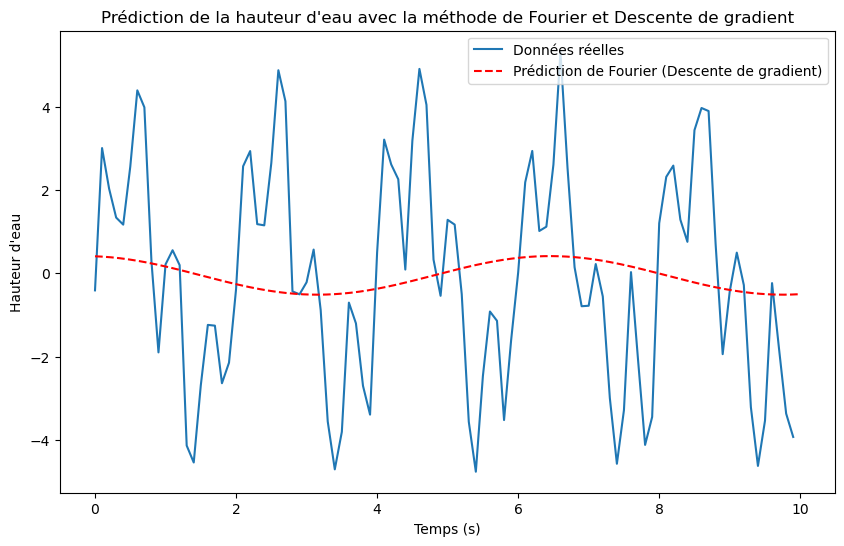

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Générer des données de hauteur d'eau fictives pour l'exemple
temps = np.arange(0, 10, 0.1)
hauteur_eau = 3 * np.sin(2 * np.pi * 0.5 * temps) + 2 * np.sin(2 * np.pi * 2 * temps) + 0.5 * np.random.normal(size=len(temps))

# Fonction de modèle avec une somme de cosinus
def modele_fourier(t, Z, *parametres):
    resultat = Z
    for i in range(0, len(parametres), 3):
        Ac = parametres[i]
        Wc = parametres[i + 1]
        Lc = parametres[i + 2]
        resultat += Ac * np.cos(Wc * t - Lc)
    return resultat

# Fonction de perte (LOSS)
def LOSS(parametres, temps, hauteur_eau):
    predictions = modele_fourier(temps, *parametres)
    return np.mean((predictions - hauteur_eau)**2)

# Gradient de la fonction de perte par rapport aux paramètres
def gradient_perte(parametres, temps, hauteur_eau):
    gradients = np.zeros_like(parametres, dtype=np.float64)  # Spécifiez explicitement le type float64
    for i in range(len(parametres)):
        h = 1e-5
        parametres_haut = parametres.copy()
        parametres_bas = parametres.copy()

        parametres_haut[i] += h
        parametres_bas[i] -= h

        loss_haut = perte(parametres_haut, temps, hauteur_eau)
        loss_bas = perte(parametres_bas, temps, hauteur_eau)

        gradients[i] = (loss_haut - loss_bas) / (2 * h)

    return gradients

# Descente de gradient
def descente_gradient(temps, hauteur_eau, parametres_initiaux, taux_apprentissage, iterations):
    parametres = np.array(parametres_initiaux, dtype=np.float64)  # Spécifiez explicitement le type float64
    
    for _ in range(iterations):
        gradients = gradient_perte(parametres, temps, hauteur_eau)
        parametres -= taux_apprentissage * gradients
    
    return parametres

# Estimation des paramètres du modèle à partir des données en utilisant la descente de gradient
parametres_initiaux = [0] + [1, 1, 0] * 2
taux_apprentissage = 0.01
iterations = 1000
parametres_optimaux = descente_gradient(temps, hauteur_eau, parametres_initiaux, taux_apprentissage, iterations)

# Générer des points temporels pour la prédiction
temps_prediction = np.arange(0, 10, 0.01)

# Faire la prédiction
hauteur_eau_predite = modele_fourier(temps_prediction, *parametres_optimaux)

# Afficher les résultats
plt.figure(figsize=(10, 6))
plt.plot(temps, hauteur_eau, label='Données réelles')
plt.plot(temps_prediction, hauteur_eau_predite, label='Prédiction de Fourier (Descente de gradient)', linestyle='--', color='red')
plt.title('Prédiction de la hauteur d\'eau avec la méthode de Fourier et Descente de gradient')
plt.xlabel('Temps (s)')
plt.ylabel('Hauteur d\'eau')
plt.legend()
plt.show()

32/32 [==============================] - 0s 2ms/step


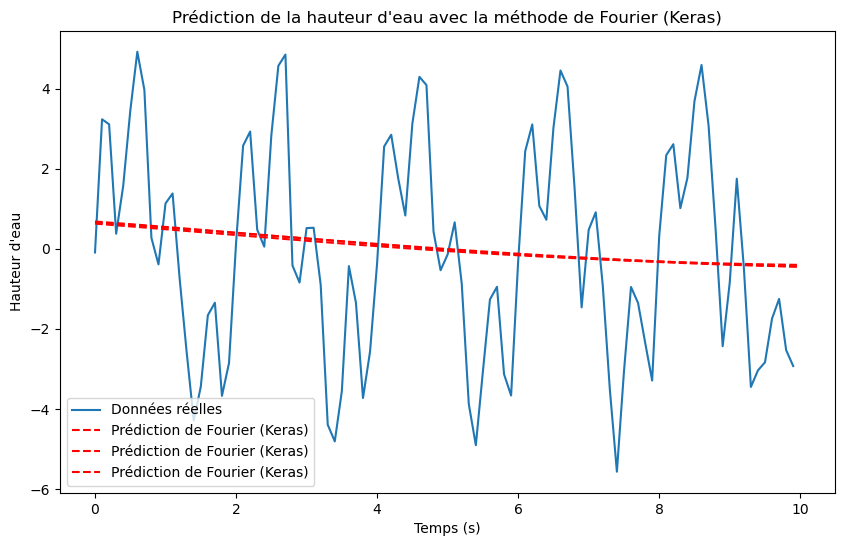

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras import backend as K

# Définition de l'activation cosinus
def custom_cosine(x):
    return K.cos(x)

# Générer des données de hauteur d'eau fictives pour l'exemple
temps = np.arange(0, 10, 0.1)
hauteur_eau = 3 * np.sin(2 * np.pi * 0.5 * temps) + 2 * np.sin(2 * np.pi * 2 * temps) + 0.5 * np.random.normal(size=len(temps))

# Créer le modèle Keras
model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))  # Z
for i in range(1, 3):
    model.add(Dense(3, activation=custom_cosine))  # Amplitude, Fréquence, Phase

# Compiler le modèle
model.compile(loss='mean_squared_error', optimizer=SGD(lr=1))

# Entraîner le modèle
model.fit(temps, hauteur_eau, epochs=1000, verbose=0)

# Générer des points temporels pour la prédiction
temps_prediction = np.arange(0, 10, 0.01)

# Faire la prédiction
hauteur_eau_predite = model.predict(temps_prediction)

# Afficher les résultats
plt.figure(figsize=(10, 6))
plt.plot(temps, hauteur_eau, label='Données réelles')
plt.plot(temps_prediction, hauteur_eau_predite, label='Prédiction de Fourier (Keras)', linestyle='--', color='red')
plt.title('Prédiction de la hauteur d\'eau avec la méthode de Fourier (Keras)')
plt.xlabel('Temps (s)')
plt.ylabel('Hauteur d\'eau')
plt.legend()
plt.show()

In [2]:
pip install jax jaxlib.

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: 'jaxlib.'


In [3]:
import jax.numpy as jnp
from jax import grad

# Générer des données de hauteur d'eau fictives pour l'exemple
temps = jnp.arange(0, 10, 0.1)
hauteur_eau = 3 * jnp.sin(2 * jnp.pi * 0.5 * temps) + 2 * jnp.sin(2 * jnp.pi * 2 * temps) + 0.5 * jnp.random.normal(size=len(temps))

# Fonction de modèle avec une somme de cosinus
def modele_fourier(t, Z, *parametres):
    resultat = Z
    for i in range(0, len(parametres), 3):
        Ac = parametres[i]
        Wc = parametres[i + 1]
        Lc = parametres[i + 2]
        resultat += Ac * jnp.cos(Wc * t - Lc)
    return resultat

# Fonction de perte (LOSS)
def LOSS(parametres, temps, hauteur_eau):
    predictions = modele_fourier(temps, *parametres)
    return jnp.mean((predictions - hauteur_eau)**2)

# Gradient de la fonction de perte par rapport aux paramètres
gradient_perte = grad(LOSS)

# Descente de gradient
def descente_gradient(temps, hauteur_eau, parametres_initiaux, taux_apprentissage, iterations):
    parametres = jnp.array(parametres_initiaux)
    
    for _ in range(iterations):
        gradients = gradient_perte(parametres, temps, hauteur_eau)
        parametres -= taux_apprentissage * gradients
    
    return parametres

# Estimation des paramètres du modèle à partir des données en utilisant la descente de gradient
parametres_initiaux = [0] + [1, 1, 0] * 2
taux_apprentissage = 0.01
iterations = 1000
parametres_optimaux = descente_gradient(temps, hauteur_eau, parametres_initiaux, taux_apprentissage, iterations)

# Générer des points temporels pour la prédiction
temps_prediction = jnp.arange(0, 10, 0.01)

# Faire la prédiction
hauteur_eau_predite = modele_fourier(temps_prediction, *parametres_optimaux)

# Afficher les résultats
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(temps, hauteur_eau, label='Données réelles')
plt.plot(temps_prediction, hauteur_eau_predite, label='Prédiction de Fourier (Descente de gradient)', linestyle='--', color='red')
plt.title('Prédiction de la hauteur d\'eau avec la méthode de Fourier et Descente de gradient (utilisant JAX)')
plt.xlabel('Temps (s)')
plt.ylabel('Hauteur d\'eau')
plt.legend()
plt.show()

ModuleNotFoundError: No module named 'jax'

In [1]:
pip install psycopg2

  Obtaining dependency information for psycopg2 from https://files.pythonhosted.org/packages/37/2c/5133dd3183a3bd82371569f0dd783e6927672de7e671b278ce248810b7f7/psycopg2-2.9.9-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.2 MB 131.3 kB/s eta 0:00:09
   -- ------------------------------------- 0.1/1.2 MB 218.8 kB/s eta 0:00:06
   --- ------------------------------------ 0.1/1.2 MB 309.1 kB/s eta 0:00:04
   ----- ---------------------------------- 0.2/1.2 MB 459.5 kB/s eta 0:0

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime, timedelta

# Constants for conversion
feet_to_meters = 0.3048
degrees_to_radians = np.pi / 180

# Provided tidal constituents with conversion from feet to meters for amplitude,
# and degrees to radians for phases and speeds.
constituents = [
    ('M2', 1.8, 190.4, 28.984104),
    ('S2', 0.45, 196.3, 30.0),
    ('N2', 0.4, 164.1, 28.43973),
    ('K1', 1.26, 219.9, 15.041069),
    ('O1', 0.77, 204.1, 13.943035),
    ('P1', 0.39, 215.0, 14.958931),
    ('M4', 0.0, 259.1, 57.96821),
    ('M6', 0.0, 92.5, 86.95232),
    ('MK3', 0.0, 200.4, 44.025173),
    ('S4', 0.0, 0.8, 60.0),
    ('MN4', 0.0, 236.7, 57.423832),
    ('NU2', 0.08, 170.0, 28.512583),
    ('S6', 0.0, 66.8, 90.0),
    ('MU2', 0.04, 124.5, 27.968208),
    ('2N2', 0.05, 135.3, 27.895355),
    ('OO1', 0.04, 249.8, 16.139101),
    ('LAM2', 0.01, 221.1, 29.455626),
    ('S1', 0.05, 316.3, 15.0),
    ('M1', 0.04, 227.2, 14.496694),
    ('J1', 0.08, 233.8, 15.5854435),
    ('MM', 0.0, 0.0, 0.5443747),
    ('SSA', 0.11, 263.3, 0.0821373),
    ('SA', 0.19, 213.3, 0.0410686),
    ('MSF', 0.0, 0.0, 1.0158958),
    ('MF', 0.0, 0.0, 1.0980331),
    ('RHO', 0.03, 198.4, 13.471515),
    ('Q1', 0.14, 196.7, 13.398661),
    ('T2', 0.02, 189.4, 29.958933),
    ('R2', 0.0, 287.8, 30.041067),
    ('2Q1', 0.02, 197.9, 12.854286),
    ('2SM2', 0.0, 347.7, 31.015896),
    ('M3', 0.01, 10.8, 43.47616),
    ('L2', 0.03, 219.7, 29.528479),
    ('2MK3', 0.0, 165.5, 42.92714),
    ('K2', 0.12, 187.0, 30.082138),
    ('M8', 0.0, 0.0, 115.93642),
    ('MS4', 0.0, 194.3, 58.984104)
]

# Convert the constituents to use meters and radians
constituents_converted = [
    (name, amp * feet_to_meters, phase * degrees_to_radians, speed * degrees_to_radians / 3600) 
    for name, amp, phase, speed in constituents
]

# Time reference (epoch) for the constituents' phase
epoch = datetime(1983, 1, 1)  # Starting point for the tidal data epoch

# Function to calculate the tidal height at a given time
def tide_height(time, constituents):
    # Calculate the number of seconds from the epoch to the prediction time
    t_seconds = (time - epoch).total_seconds()
    # Initialize the height with the reference level (Z0), which is 0 for MSL
    height = 0.0
    # Add the contribution of each constituent
    for _, amplitude, phase, speed in constituents:
        height += amplitude * np.cos(speed * t_seconds + phase)
    return height

# Generate the predicted tide heights for a full day at one-hour intervals
start_time = datetime(2024, 2, 19)
times = [start_time + timedelta(hours=i) for i in range(24)]
predicted_heights = [tide_height(t, constituents_converted) for t in times]

# Trouver les marées hautes et basses dans les 24 heures
high_tides = []
low_tides = []

# Parcourir les hauteurs prédites des marées
for i in range(1, len(predicted_heights) - 1):
    # Vérifier si la hauteur change de croissance à décroissance (marée haute)
    if predicted_heights[i] > predicted_heights[i - 1] and predicted_heights[i] > predicted_heights[i + 1]:
        high_tides.append((times[i], predicted_heights[i]))
    # Vérifier si la hauteur change de décroissance à croissance (marée basse)
    elif predicted_heights[i] < predicted_heights[i - 1] and predicted_heights[i] < predicted_heights[i + 1]:
        low_tides.append((times[i], predicted_heights[i]))

# Afficher les marées hautes et basses
print("Marées hautes dans les 24 heures :")
for tide in high_tides:
    print("- Heure : {}, Hauteur : {:.2f} m".format(tide[0].strftime("%H:%M"), tide[1]))

print("\nMarées basses dans les 24 heures :")
for tide in low_tides:
    print("- Heure : {}, Hauteur : {:.2f} m".format(tide[0].strftime("%H:%M"), tide[1]))

# Convert times to matplotlib date format for plotting
times_plt = mdates.date2num(times)

# Read NOAA CSV data for predicted and verified water levels
noaa_csv_path = 'CO-OPS_9415020_met.csv'
noaa_data = pd.read_csv

print("Pour détecter les marées hautes, le code vérifie si la hauteur prédite à l'heure i est supérieure à celle à l'heure précédente (i - 1) et à celle à l'heure suivante (i + 1). Si c'est le cas, cela signifie qu'il y a une transition d'une tendance de croissance à une tendance de décroissance, ce qui correspond à une marée haute.De manière similaire, pour détecter les marées basses, le code vérifie si la hauteur prédite à l'heure i est inférieure à celle à l'heure précédente (i - 1) et à celle à l'heure suivante (i + 1). Si c'est le cas, cela signifie qu'il y a une transition d'une tendance de décroissance à une tendance de croissance, ce qui correspond à une marée basse.")

Marées hautes dans les 24 heures :
- Heure : 02:00, Hauteur : 0.64 m
- Heure : 12:00, Hauteur : 0.32 m

Marées basses dans les 24 heures :
- Heure : 08:00, Hauteur : 0.15 m
- Heure : 19:00, Hauteur : -0.90 m
Pour détecter les marées hautes, le code vérifie si la hauteur prédite à l'heure i est supérieure à celle à l'heure précédente (i - 1) et à celle à l'heure suivante (i + 1). Si c'est le cas, cela signifie qu'il y a une transition d'une tendance de croissance à une tendance de décroissance, ce qui correspond à une marée haute.De manière similaire, pour détecter les marées basses, le code vérifie si la hauteur prédite à l'heure i est inférieure à celle à l'heure précédente (i - 1) et à celle à l'heure suivante (i + 1). Si c'est le cas, cela signifie qu'il y a une transition d'une tendance de décroissance à une tendance de croissance, ce qui correspond à une marée basse.


In [13]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import matplotlib.dates as mdates

# Constants for conversion
feet_to_meters = 0.3048
degrees_to_radians = np.pi / 180

# Provided tidal constituents with conversion from feet to meters for amplitude,
# and degrees to radians for phases and speeds.
constituents = [
    ('M2', 1.8, 190.4, 28.984104),
    ('S2', 0.45, 196.3, 30.0),
    ('N2', 0.4, 164.1, 28.43973),
    ('K1', 1.26, 219.9, 15.041069),
    ('O1', 0.77, 204.1, 13.943035),
    ('P1', 0.39, 215.0, 14.958931),
    ('M4', 0.0, 259.1, 57.96821),
    ('M6', 0.0, 92.5, 86.95232),
    ('MK3', 0.0, 200.4, 44.025173),
    ('S4', 0.0, 0.8, 60.0),
    ('MN4', 0.0, 236.7, 57.423832),
    ('NU2', 0.08, 170.0, 28.512583),
    ('S6', 0.0, 66.8, 90.0),
    ('MU2', 0.04, 124.5, 27.968208),
    ('2N2', 0.05, 135.3, 27.895355),
    ('OO1', 0.04, 249.8, 16.139101),
    ('LAM2', 0.01, 221.1, 29.455626),
    ('S1', 0.05, 316.3, 15.0),
    ('M1', 0.04, 227.2, 14.496694),
    ('J1', 0.08, 233.8, 15.5854435),
    ('MM', 0.0, 0.0, 0.5443747),
    ('SSA', 0.11, 263.3, 0.0821373),
    ('SA', 0.19, 213.3, 0.0410686),
    ('MSF', 0.0, 0.0, 1.0158958),
    ('MF', 0.0, 0.0, 1.0980331),
    ('RHO', 0.03, 198.4, 13.471515),
    ('Q1', 0.14, 196.7, 13.398661),
    ('T2', 0.02, 189.4, 29.958933),
    ('R2', 0.0, 287.8, 30.041067),
    ('2Q1', 0.02, 197.9, 12.854286),
    ('2SM2', 0.0, 347.7, 31.015896),
    ('M3', 0.01, 10.8, 43.47616),
    ('L2', 0.03, 219.7, 29.528479),
    ('2MK3', 0.0, 165.5, 42.92714),
    ('K2', 0.12, 187.0, 30.082138),
    ('M8', 0.0, 0.0, 115.93642),
    ('MS4', 0.0, 194.3, 58.984104)
]

# Convert the constituents to use meters and radians
constituents_converted = [
    (name, amp * feet_to_meters, phase * degrees_to_radians, speed * degrees_to_radians / 3600) 
    for name, amp, phase, speed in constituents
]

# Time reference (epoch) for the constituents' phase
epoch = datetime(1983, 1, 1)  # Starting point for the tidal data epoch

# Function to calculate the tidal height at a given time
def tide_height(time, constituents):
    # Calculate the number of seconds from the epoch to the prediction time
    t_seconds = (time - epoch).total_seconds()
    # Initialize the height with the reference level (Z0), which is 0 for MSL
    height = 0.0
    # Add the contribution of each constituent
    for _, amplitude, phase, speed in constituents:
        height += amplitude * np.cos(speed * t_seconds + phase)
    return height

# Generate the predicted tide heights for a full day at one-hour intervals
start_time = datetime(2024, 2, 19)
times = [start_time + timedelta(hours=i) for i in range(24)]
predicted_heights = [tide_height(t, constituents_converted) for t in times]

# Find high and low tides within the next 24 hours
def find_high_low_tides(times, predicted_heights):
    high_tides = []
    low_tides = []
    for i in range(1, len(predicted_heights) - 1):
        if predicted_heights[i] > predicted_heights[i - 1] and predicted_heights[i] > predicted_heights[i + 1]:
            high_tides.append((times[i], predicted_heights[i]))
        elif predicted_heights[i] < predicted_heights[i - 1] and predicted_heights[i] < predicted_heights[i + 1]:
            low_tides.append((times[i], predicted_heights[i]))
    return high_tides, low_tides

# Find high and low tides
high_tides, low_tides = find_high_low_tides(times, predicted_heights)

# Print high and low tides
print("High Tides in the next 24 hours:")
for tide in high_tides:
    print(f"{tide[0].strftime('%H:%M')}: Height {tide[1]:.2f} m")

print("\nLow Tides in the next 24 hours:")
for tide in low_tides:
    print(f"{tide[0].strftime('%H:%M')}: Height {tide[1]:.2f} m")


High Tides in the next 24 hours:
02:00: Height 0.64 m
12:00: Height 0.32 m

Low Tides in the next 24 hours:
08:00: Height 0.15 m
19:00: Height -0.90 m
